Length of list at key "stage": 129125
Length of list at key "table_idx": 0
Length of list at key "Iteration": 129125
Length of list at key "batch_num": 0
Length of list at key "loss_per_t": 129125
Length of list at key "diffusion_steps_t": 129125


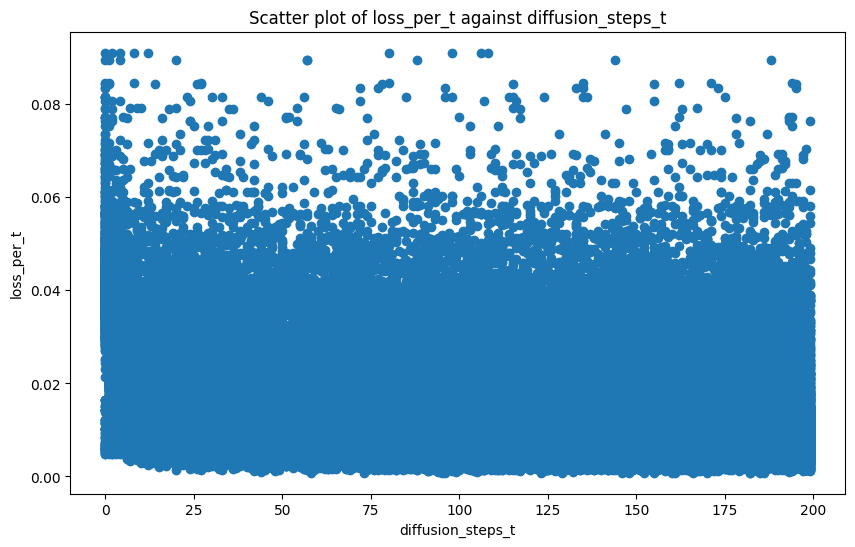

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)  # Set default figure size

filename = \
"/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/SSSDS4/context5000_label5000/T200_beta000001_betaT002/17_59_06_07_24_ywwhgg9f/track_t_data_table.json"
# "/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/SSSDS4/context5000_label5000/T200_beta000001_betaT002/13_24_09_07_24_a6blw72n/track_t_data_table_144.json"
# "/home/liranc6/ecg_forecasting/liran_project/results/icentia11k/SSSDS4/context5000_label5000/T200_beta000001_betaT002/13_24_09_07_24_a6blw72n/track_t_data_table_1.json"

#open track_t_data_table from a file
with open(filename, 'r') as f:
    track_t_data_table = json.load(f)

# Print the lengths of the lists in the dictionary
for key, value in track_t_data_table.items():
    print(f'Length of list at key "{key}": {len(value)}')

# Remove keys with lists of size 0
track_t_data_table = {k: v for k, v in track_t_data_table.items() if len(v) != 0}

# Convert dictionary to DataFrame
df = pd.DataFrame(track_t_data_table)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['diffusion_steps_t'], df['loss_per_t'])
plt.xlabel('diffusion_steps_t')
plt.ylabel('loss_per_t')
plt.title('Scatter plot of loss_per_t against diffusion_steps_t')
plt.show()

<Figure size 3000x600 with 0 Axes>

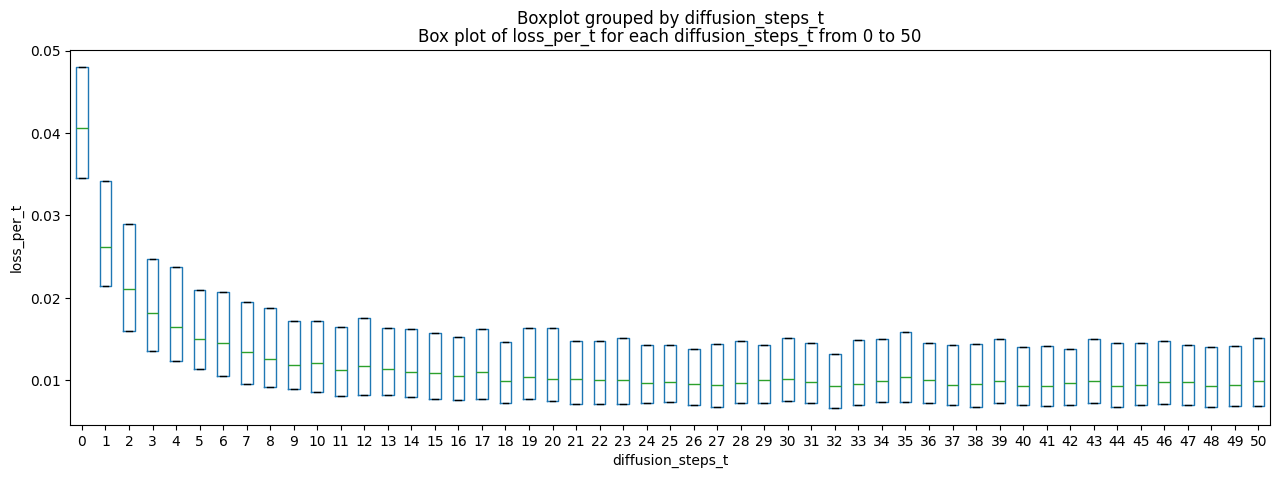

<Figure size 3000x600 with 0 Axes>

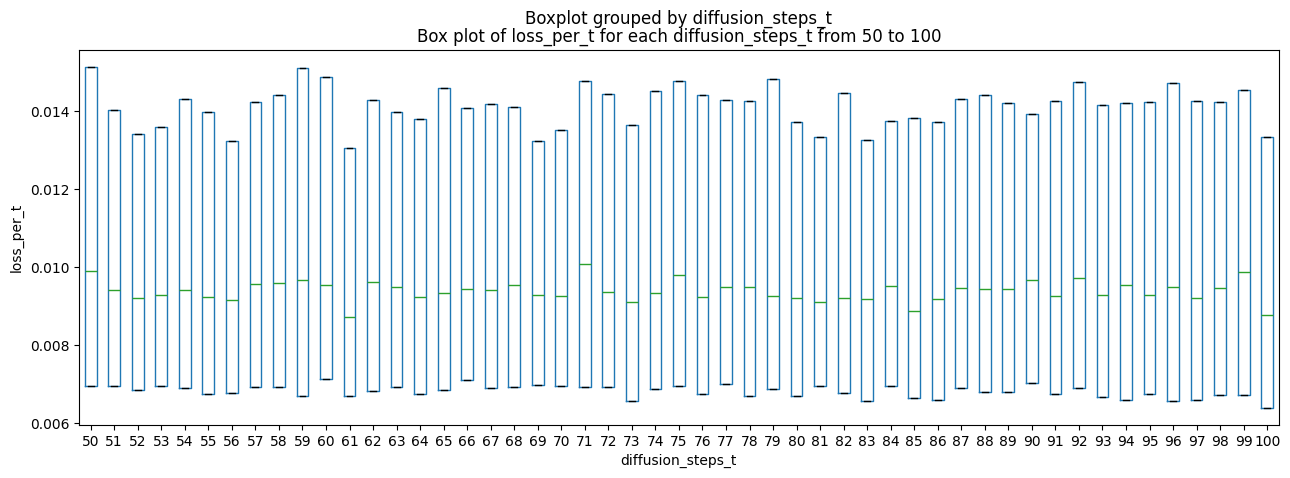

<Figure size 3000x600 with 0 Axes>

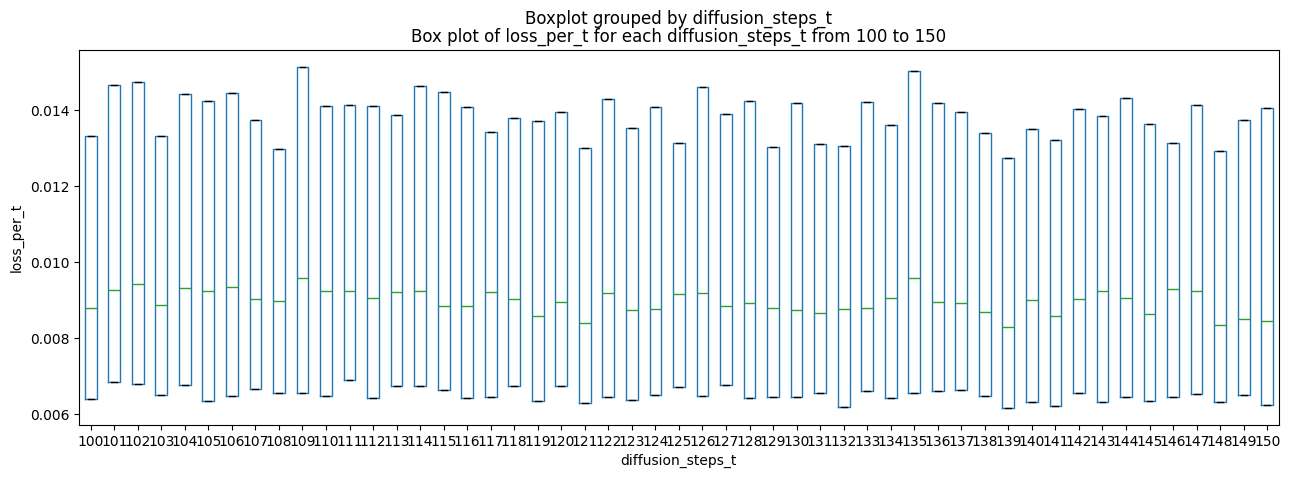

<Figure size 3000x600 with 0 Axes>

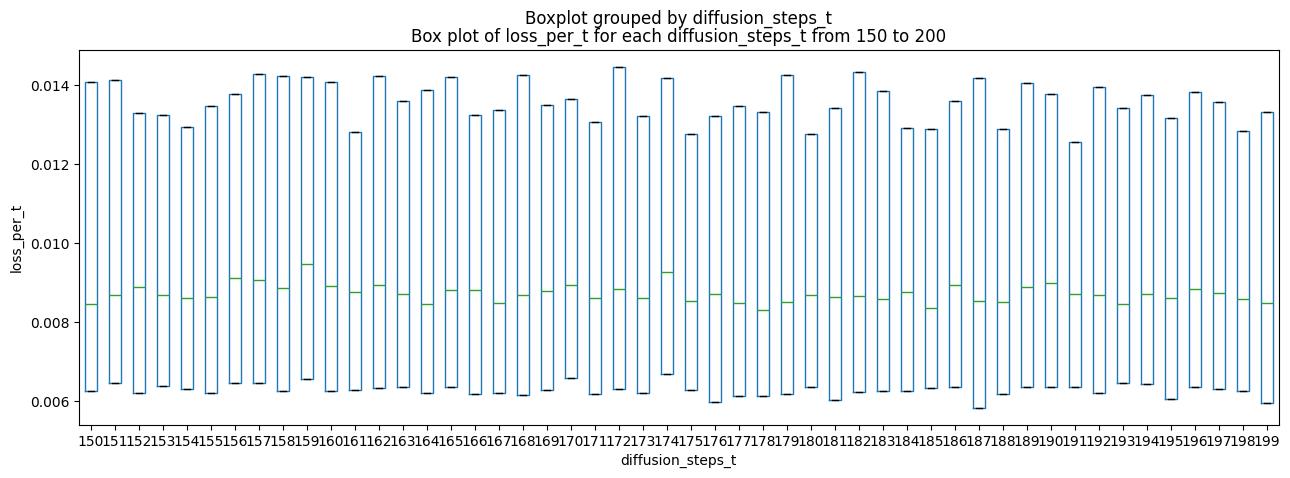

<Figure size 3000x600 with 0 Axes>

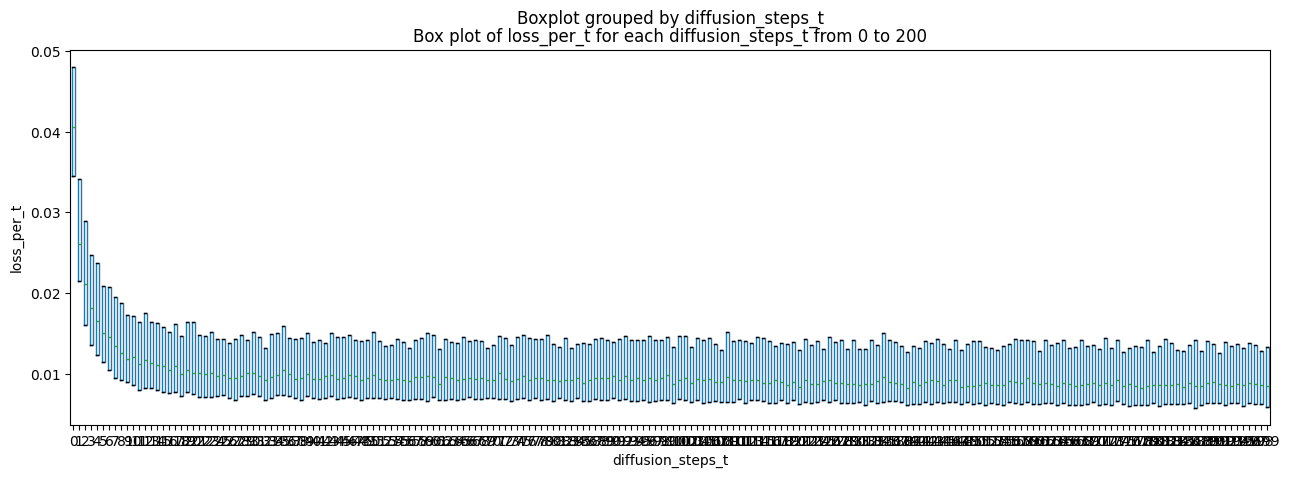

In [2]:
# Define the ranges
ranges = [(0, 50), (50, 100), (100, 150), (150, 200), (0, 200)]

# Create a box plot for each range
for start, end in ranges:
    df_filtered = df[df['diffusion_steps_t'].between(start, end)]
    plt.figure(figsize=(30, 6))  # Increase the width to 15
    df_filtered.boxplot(column='loss_per_t', by='diffusion_steps_t', whis=0, showfliers=False)
    plt.xlabel('diffusion_steps_t')
    plt.ylabel('loss_per_t')
    plt.title(f'Box plot of loss_per_t for each diffusion_steps_t from {start} to {end}')
    plt.grid(False)
    plt.show()

<Figure size 3000x600 with 0 Axes>

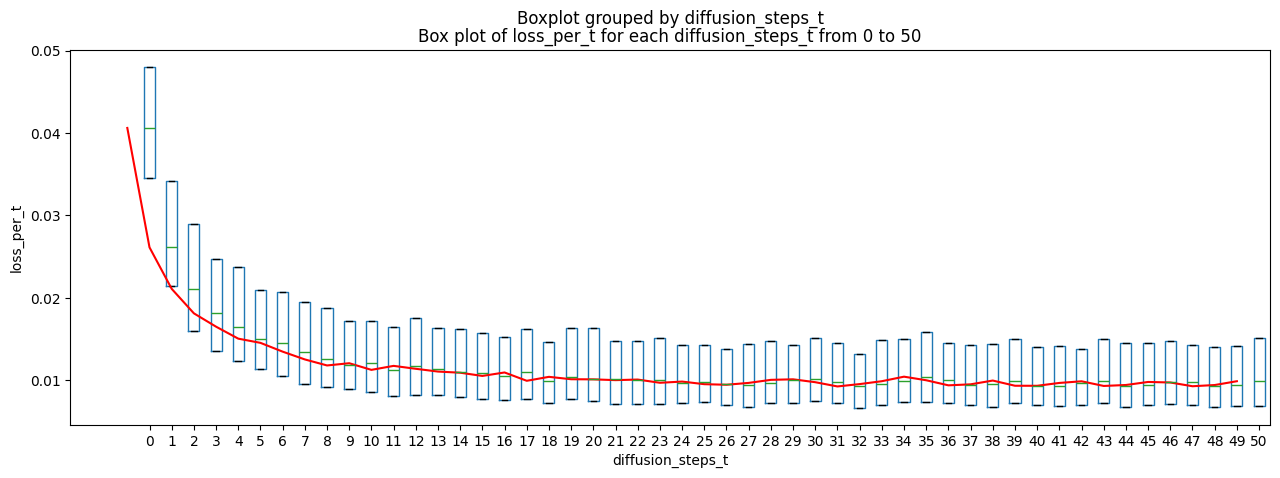

<Figure size 3000x600 with 0 Axes>

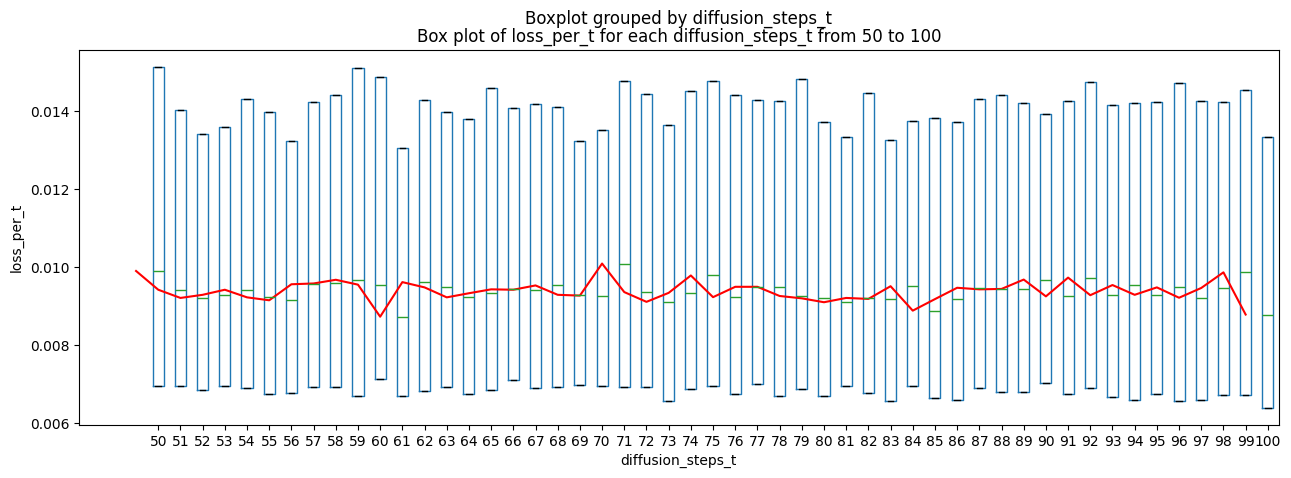

<Figure size 3000x600 with 0 Axes>

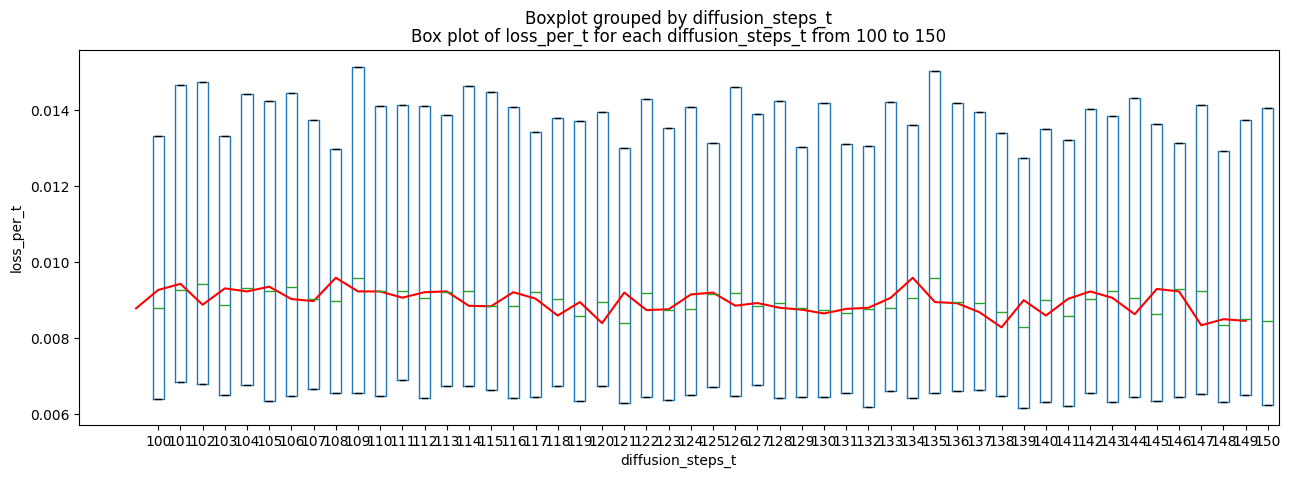

<Figure size 3000x600 with 0 Axes>

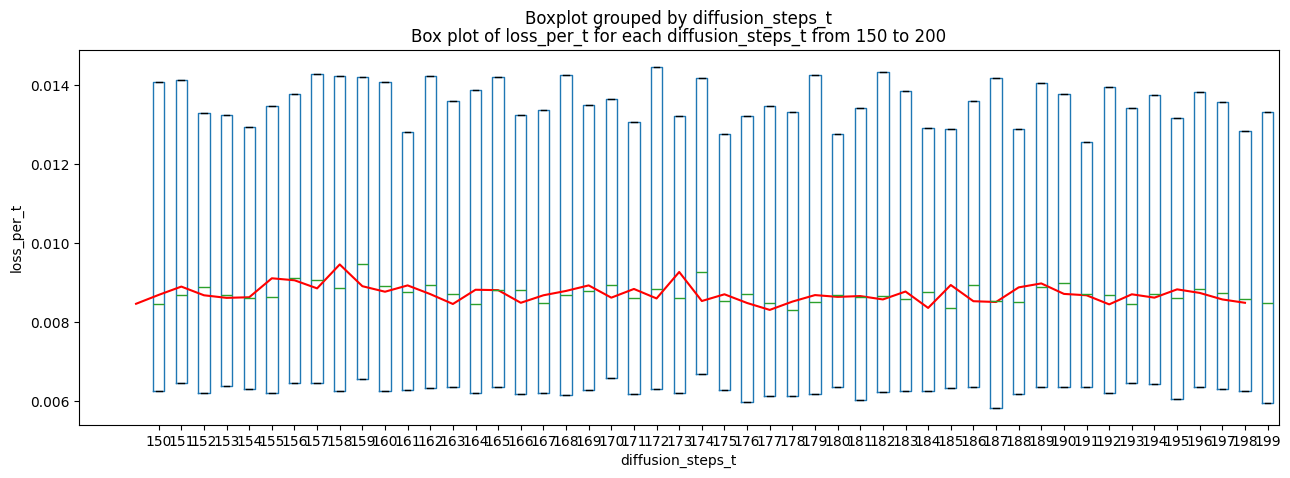

<Figure size 3000x600 with 0 Axes>

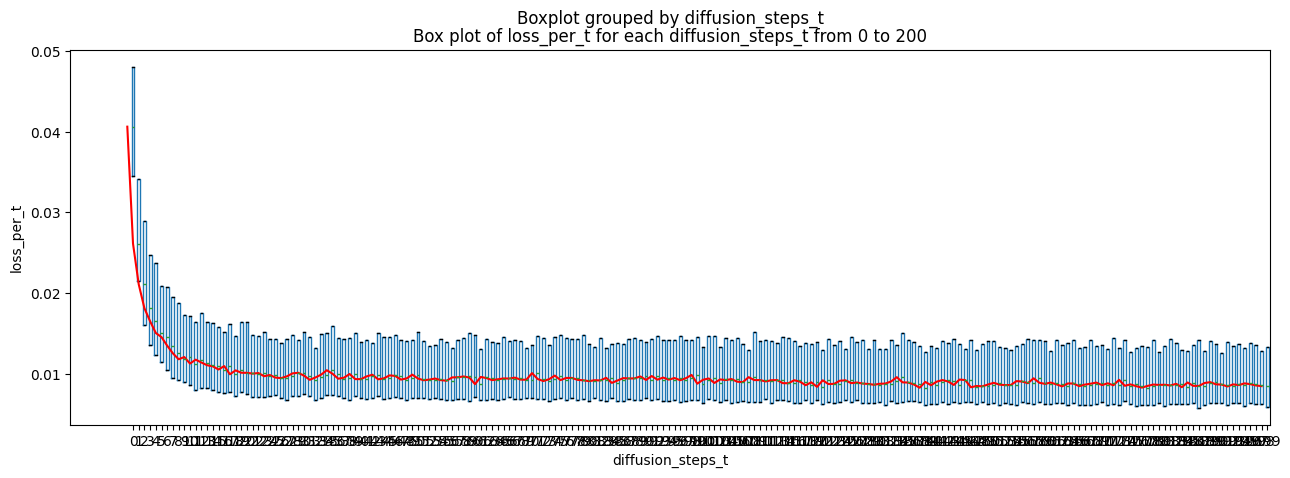

In [3]:
# Define the ranges
ranges = [(0, 50), (50, 100), (100, 150), (150, 200), (0, 200)]

# Create a box plot for each range
for start, end in ranges:
    df_filtered = df[df['diffusion_steps_t'].between(start, end)]
    plt.figure(figsize=(30, 6))  # Increase the width to 15
    boxplot = df_filtered.boxplot(column='loss_per_t', by='diffusion_steps_t', whis=0, showfliers=False, return_type='dict')
    
    # Calculate the medians and plot a line connecting them
    medians = [median.get_ydata()[0] for median in boxplot['loss_per_t']['medians']]
    plt.plot(range(len(medians)), medians, color='red')
    
    plt.xlabel('diffusion_steps_t')
    plt.ylabel('loss_per_t')
    plt.title(f'Box plot of loss_per_t for each diffusion_steps_t from {start} to {end}')
    plt.grid(False)
    plt.show()

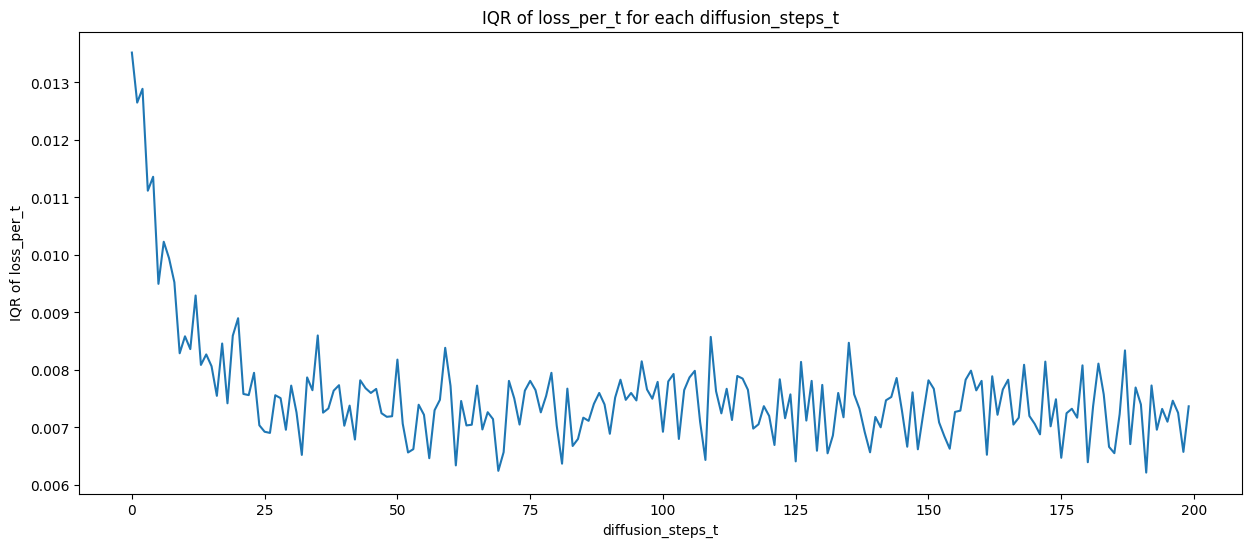

In [4]:
# Calculate the IQR for each diffusion_steps_t
df['IQR'] = df.groupby('diffusion_steps_t')['loss_per_t'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Plot the IQR by diffusion_steps_t
plt.figure(figsize=(15, 6))
df['IQR'].plot(kind='line')
plt.xlabel('diffusion_steps_t')
plt.ylabel('IQR of loss_per_t')
plt.title('IQR of loss_per_t for each diffusion_steps_t')
plt.grid(False)
plt.show()

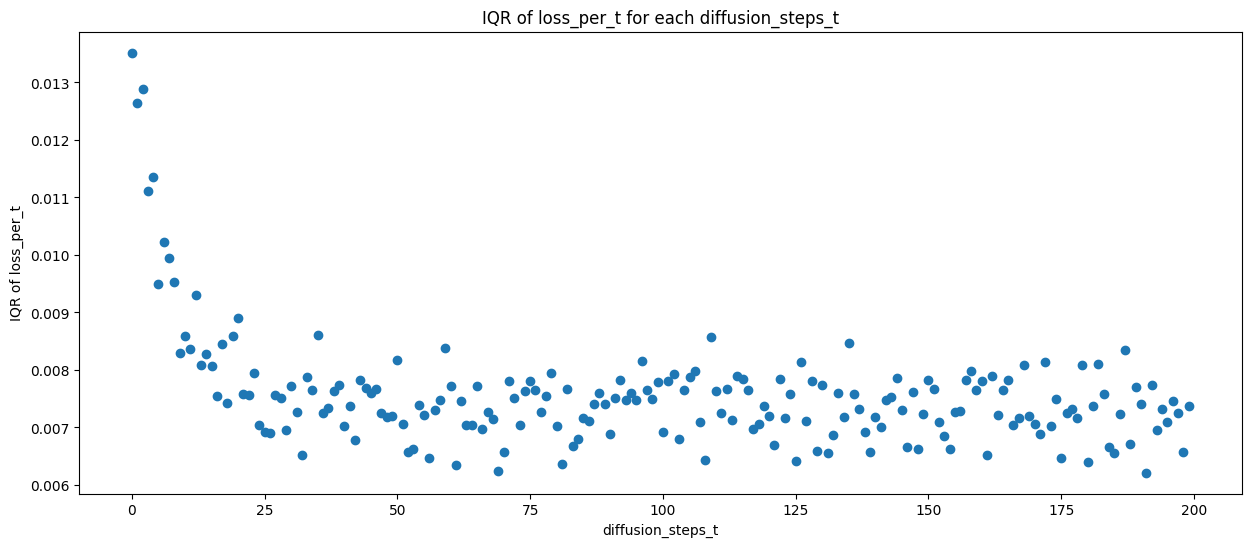

In [5]:
# Calculate the IQR for each diffusion_steps_t
df['IQR'] = df.groupby('diffusion_steps_t')['loss_per_t'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))

# Plot the IQR by diffusion_steps_t
plt.figure(figsize=(15, 6))
plt.scatter(df.index, df['IQR'])
plt.xlabel('diffusion_steps_t')
plt.ylabel('IQR of loss_per_t')
plt.title('IQR of loss_per_t for each diffusion_steps_t')
plt.grid(False)
plt.show()

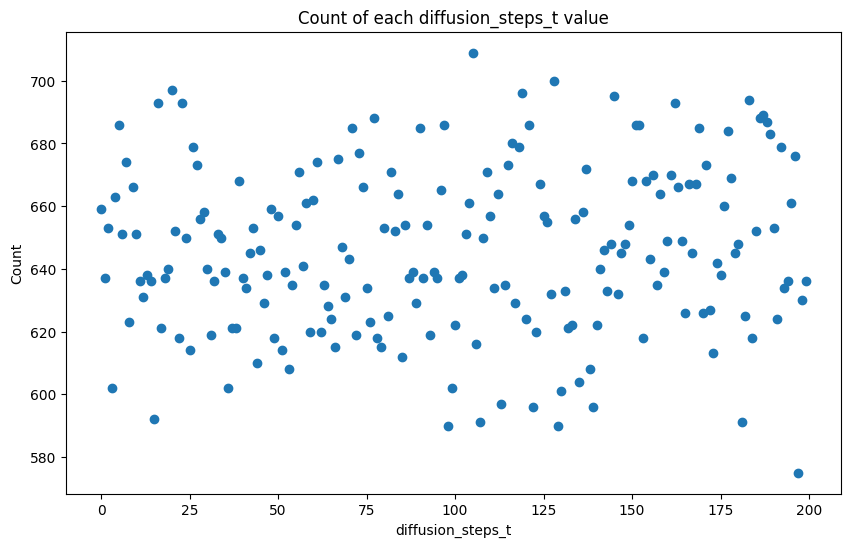

In [6]:
# Count the occurrences of each diffusion_steps_t value
counts = df['diffusion_steps_t'].value_counts()

# Create the plot
plt.figure(figsize=(10, 6))
counts.sort_index().plot(style='o')
plt.xlabel('diffusion_steps_t')
plt.ylabel('Count')
plt.title('Count of each diffusion_steps_t value')
plt.show()

In [7]:
df.head

<bound method NDFrame.head of         stage  Iteration  loss_per_t  diffusion_steps_t       IQR
0       train         94     0.01129                 92  0.013520
1       train         94     0.01129                182  0.012650
2       train         94     0.01129                124  0.012890
3       train         94     0.01129                112  0.011117
4       train         94     0.01129                 68  0.011360
...       ...        ...         ...                ...       ...
129120  train        127     0.02958                193       NaN
129121  train        127     0.02958                129       NaN
129122  train        127     0.02958                174       NaN
129123  train        127     0.02958                150       NaN
129124  train        127     0.02958                  2       NaN

[129125 rows x 5 columns]>

Sampled Steps: [ 91   4  97  66 186 195  33  80  65 165]


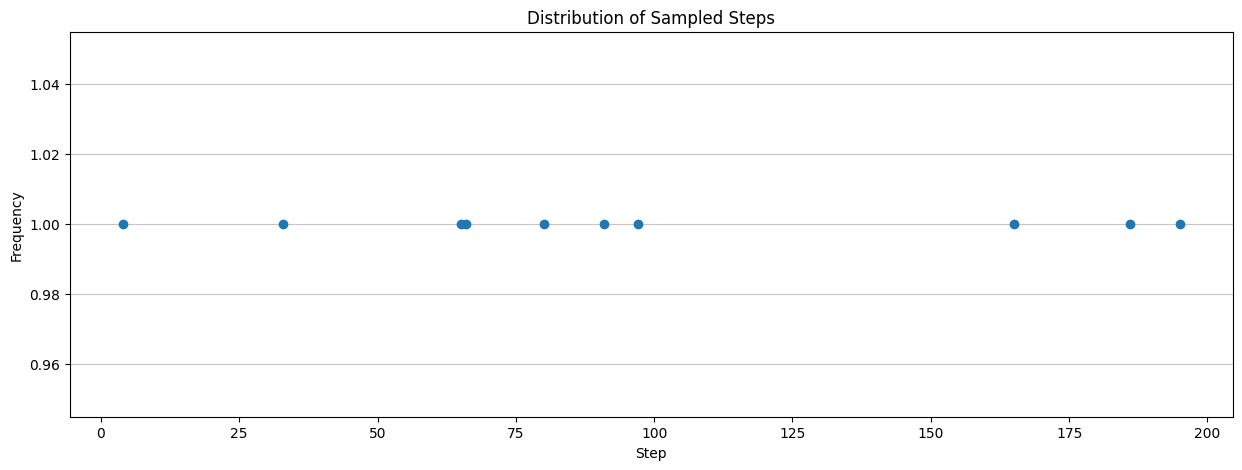

In [18]:
# Group the dataframe by 'diffusion_steps_t' and calculate the mean of 'loss_per_t' for each group
mean_loss_per_t = df.groupby('diffusion_steps_t')['loss_per_t'].mean()

# Convert the Series to a dictionary
mean_loss_dict = mean_loss_per_t.to_dict()

# print(mean_loss_dict)
import numpy as np
def t_importance_sampling(T, mean_loss_dict, B):
    # Convert the mean_loss_dict values to a list in the same order as the keys
    loss_per_step = [mean_loss_dict[t] for t in range(T)]
    
    # Normalize the loss_per_step to get a probability distribution
    prob_t = np.exp(loss_per_step) / np.sum(np.exp(loss_per_step))
    
    # Sample B steps based on the probability distribution
    t_samples = np.random.choice(T, size=B, p=prob_t)
    
    return t_samples

# Example usage:
T = 200  # Total number of diffusion steps
B = 10   # Number of steps to sample

sampled_steps = t_importance_sampling(T, mean_loss_dict, B)
print("Sampled Steps:", sampled_steps)
import matplotlib.pyplot as plt

def plot_distribution(sampled_steps):
    unique, counts = np.unique(sampled_steps, return_counts=True)
    plt.plot(unique, counts, 'o')
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Step')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sampled Steps')
    plt.show()

# Call the function to plot the distribution of the sampled steps
plot_distribution(sampled_steps)

In [19]:
# Group the DataFrame by 'diffusion_steps_t' and calculate the median of 'loss_per_t' for each group
medians = df.groupby('diffusion_steps_t')['loss_per_t'].median()

# Convert the result to a list
medians_list = medians.tolist()

# for t, med in enumerate(medians_list, 1):
    # print(f"{t}: {med}")
# print(medians_list)

import random

# Convert the list of medians to a dictionary
medians_dict = {t: med for t, med in enumerate(medians_list, 1)}

# Normalize the values in the dictionary
total = sum(medians_dict.values())
for key in medians_dict:
    medians_dict[key] /= total

# Sample a 't' value from the dictionary
t_sample = random.choices(list(medians_dict.keys()), weights=list(medians_dict.values()), k=1)[0]


def t_importance_sampling(T, mean_loss_dict, B):
    # Convert the mean_loss_dict to a dictionary where the keys are the 't' values and the values are the corresponding losses
    loss_dict = {t: loss for t, loss in mean_loss_dict.items()}

    # Normalize the values in the dictionary
    total = sum(loss_dict.values())
    for key in loss_dict:
        loss_dict[key] /= total

    # Sample B 't' values from the dictionary
    t_samples = random.choices(list(loss_dict.keys()), weights=list(loss_dict.values()), k=B)
    
    return t_samples

# Use the function to sample 't' values
t_samples = t_importance_sampling(T, mean_loss_dict, B)

# Print the sampled 't' values
print(t_samples)

[180, 37, 58, 144, 101, 84, 158, 9, 191, 32]


In [25]:
medians

diffusion_steps_t
0      0.040610
1      0.026130
2      0.021100
3      0.018130
4      0.016510
         ...   
195    0.008610
196    0.008820
197    0.008730
198    0.008565
199    0.008480
Name: loss_per_t, Length: 200, dtype: float64

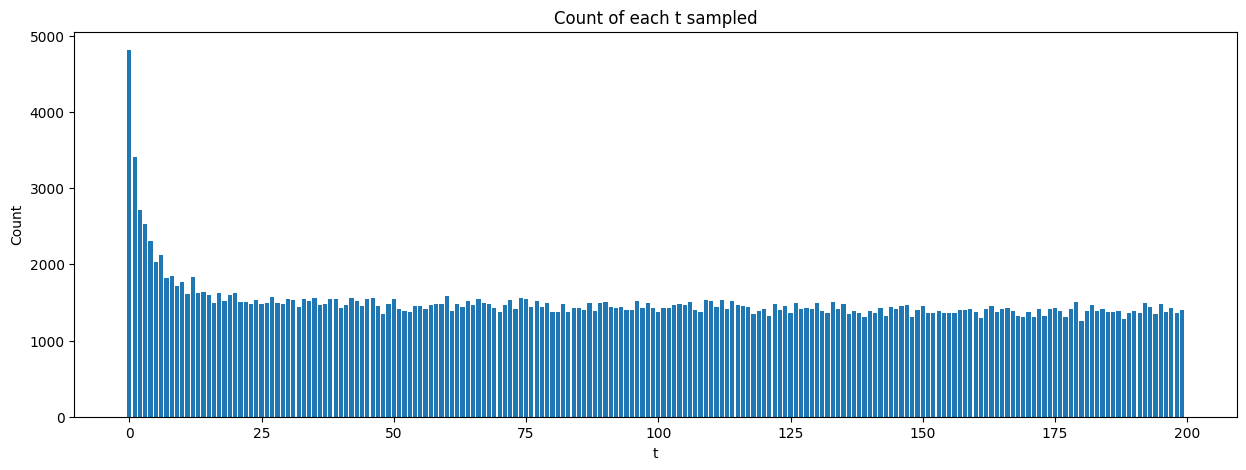

In [24]:
import collections
import matplotlib.pyplot as plt

# Initialize an empty list to store the sampled 't' values
t_samples = []

# Loop 1000 times
for _ in range(30000):
    # Sample 't' values and add them to the list
    t_samples.extend(t_importance_sampling(T, mean_loss_dict, B))

# Count the occurrences of each 't' value
counts = collections.Counter(t_samples)

# Create a bar plot
plt.bar(counts.keys(), counts.values())

# Label the axes and give the plot a title
plt.xlabel('t')
plt.ylabel('Count')
plt.title('Count of each t sampled')

# Display the plot
plt.show()

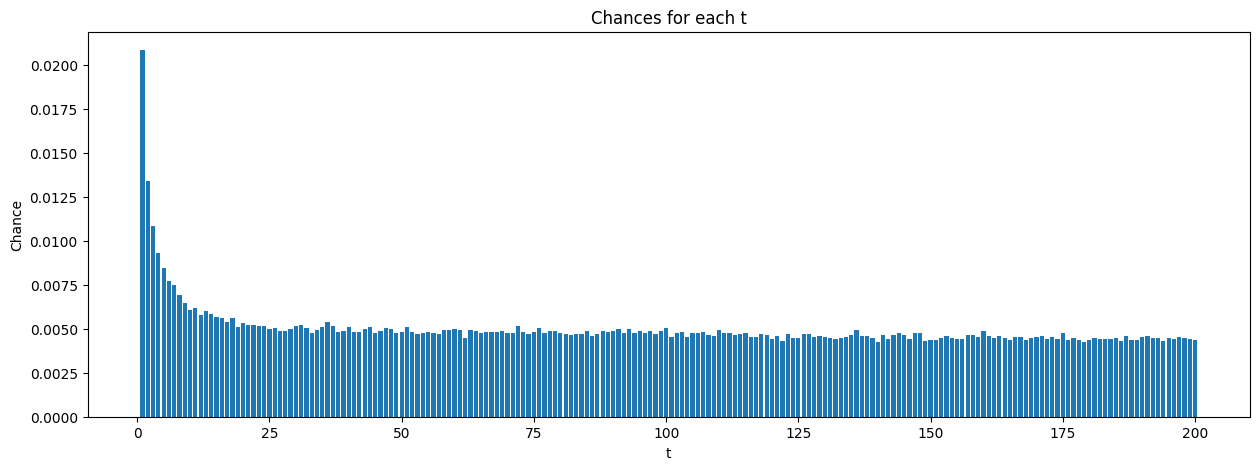

In [20]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.bar(medians_dict.keys(), medians_dict.values())

# Label the axes and give the plot a title
plt.xlabel('t')
plt.ylabel('Chance')
plt.title('Chances for each t')

# Display the plot
plt.show()